# Lab 8: K-Means Clustering from Scratch
## by Tiffany Nguyen
The purpose of this lab is to use K-means clustering to classify digits in the MNIST Dataset

### Part 1: Read Data

In [273]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X = mnist["data"]
print(X.shape)

(70000, 784)


In [274]:
# get first 2000 images
imgX = X[0:2000]
print(imgX.shape)

(2000, 784)


### Part 2: Implement K-means Clustering
Euclidean Distance:
$$\sum_{i=1}^{N} [(X_i - c)^2]$$
Sum of Squared Error Loss Function:
$$SSE = \sum_{i=1}^{N} (X_i - \bar{X})^2$$

In [275]:
import numpy as np

In [276]:
# k refers to the number of clusters, m refers to the number of initializations
def my_kmeans(X, K, M):
  rng = np.random.default_rng(1) #  fixed seed
  bestLossSeq = np.empty((0)) # sequence of loss function over k iterations for best solution
  lastLossVal = np.zeros(M) # final loss value for all M initializations 
  bestKCentroid = np.empty((K, X.shape[1]))
  test = True

  # loop over different initializations
  for m in range(M):
    print("\nM", m)
    prevCentroids = -1 * np.ones((K, X.shape[1]))
    centroids = rng.choice(X, K, replace=False)
    curLossSeq = np.empty((0))

    # k-means loop
    while(np.any(prevCentroids != centroids)):
      prevCentroids = np.copy(centroids)
      allDist = np.empty((K, X.shape[0])) #distance to all centroids -> each centroid is a row, data points are columns
      for k in range(K):
        # compute distance between samples and centroid
        allDist[k] = np.sum(np.power(np.subtract(X, centroids[k]), 2), axis = 1)

      # assign observations to clusters
      sampleCluster = np.argmin(allDist, axis=0)

      # recompute centroid using mean of each cluster
      for k in range(K):
        clusterIndices = np.where(sampleCluster == k)[0] # get index where data is in current centroid
        if(len(clusterIndices) != 0):
          centroids[k] = np.mean(np.take(X, clusterIndices, axis = 0), axis = 0)
      
      # calculate sum of squared error
      curLoss = 0 
      for i in range(len(X)):
        curLoss += np.power(np.sum(np.subtract(X[i], sampleCluster[i])), 2) # loss for current K
      print("curLoss", curLoss, end="\r")
      curLossSeq = np.append(curLossSeq, curLoss)
      
    # update loss variables
    lastLossVal[m] = curLossSeq[-1]
    if (len(bestLossSeq) == 0):
      bestLossSeq = curLossSeq
      bestKCentroid = centroids
    if(curLossSeq[-1] < bestLossSeq[-1]): # if the final loss value is the best
      bestLossSeq = curLossSeq
      bestKCentroid = centroids

  # return values
  return bestKCentroid, bestLossSeq, lastLossVal

In [277]:
# Run K-means loss
bestKCentroid, bestLossSeq, lastLossVal = my_kmeans(imgX, 10, 15)
print("Values:")
print("bestLossSeq", bestLossSeq)
print("lastLossVal", lastLossVal)


M 0
curLoss 1207151126231
M 1
curLoss 1207222249143
M 2
curLoss 1160374639607
M 3
curLoss 1165508922327
M 4
curLoss 1212910432567
M 5
curLoss 1134020987639
M 6
curLoss 1167849756599
M 7
curLoss 1168318761079
M 8
curLoss 1163130686551
M 9
curLoss 1173693954455
M 10
curLoss 1204686612823
M 11
curLoss 1206448069527
M 12
curLoss 1191203959415
M 13
curLoss 1185080841015
M 14
Values: 1177249546551
bestLossSeq [1.22280099e+12 1.21215123e+12 1.20282230e+12 1.19302054e+12
 1.18582541e+12 1.18327728e+12 1.18374978e+12 1.17946413e+12
 1.17488982e+12 1.17129798e+12 1.16940882e+12 1.16693549e+12
 1.16492534e+12 1.16075008e+12 1.15660348e+12 1.15493306e+12
 1.15504402e+12 1.15410743e+12 1.15227263e+12 1.15052983e+12
 1.14785432e+12 1.14574600e+12 1.14389154e+12 1.14054791e+12
 1.13676226e+12 1.13534074e+12 1.13447869e+12 1.13453038e+12
 1.13452843e+12 1.13454522e+12 1.13402099e+12 1.13402099e+12]
lastLossVal [1.20715113e+12 1.20722225e+12 1.16037464e+12 1.16550892e+12
 1.21291043e+12 1.13402099e+12

### Part 3: Plots

In [278]:
import matplotlib.pyplot as plt

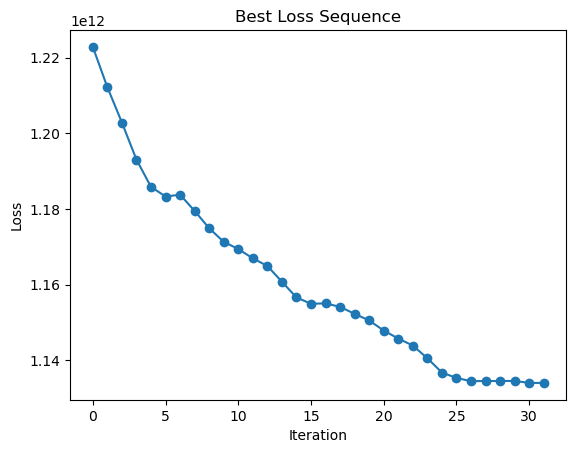

In [279]:
# Plot Best Loss Sequence
plt.plot(bestLossSeq, 'o-')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Best Loss Sequence')
plt.show()

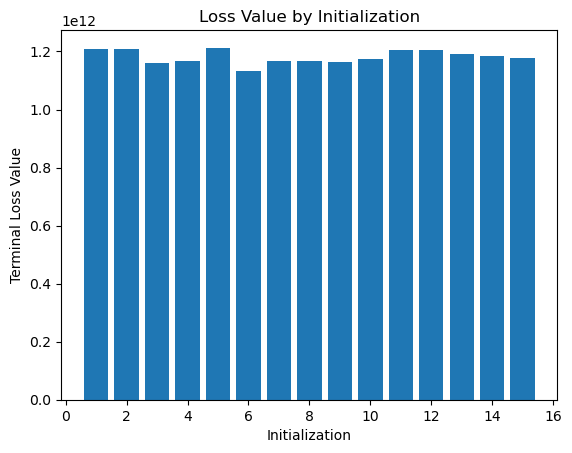

In [280]:
# Plot Terminal Loss-function values for all initializations
X = np.arange(1, len(lastLossVal) + 1) 
plt.bar(X, lastLossVal)
plt.xlabel('Initialization')
plt.ylabel('Terminal Loss Value')
plt.title('Loss Value by Initialization')
plt.show()

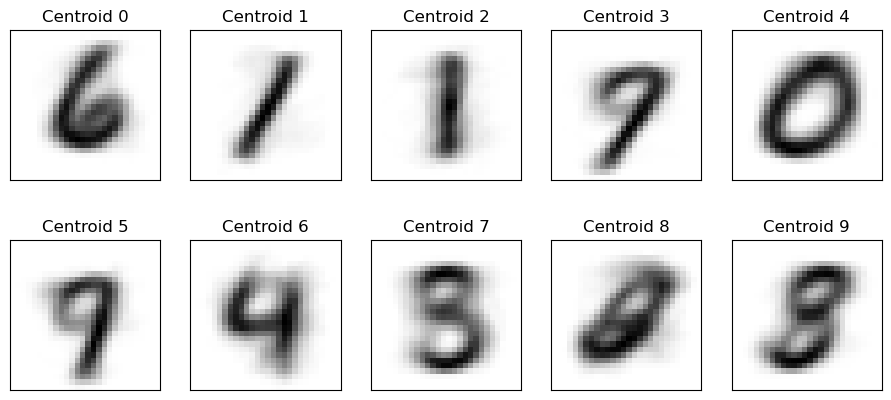

In [281]:
# Plot Centroids
def plot_centroids(centroids):
    # compute size of plot
    per_row = int(np.ceil(len(centroids)/2))
    _, ax = plt.subplots(2, per_row, figsize = (2.25 * per_row, 5))

    # reshape centroids to be 28 x 28
    centers = centroids.reshape(len(centroids), 28, 28)

    # plot each centroid
    for i, (axi, center) in enumerate(zip(ax.flat, centers)):
        axi.set_title(f'Centroid {i}')
        axi.set(xticks=[], yticks=[])
        axi.imshow(center, interpolation="nearest", cmap=plt.cm.binary)
    
    # blank out extra plot if there is an odd number of centroids
    if len(centroids) % 2 == 1:
        ax.flat[-1].set(xticks=[], yticks=[])
        ax.flat[-1].axis("off")
plot_centroids(bestKCentroid)